In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_height, img_width = 128, 128
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Covid19-dataset/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Covid19-dataset/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

NotFoundError: Could not find directory /content/drive/MyDrive/Covid19-dataset/train

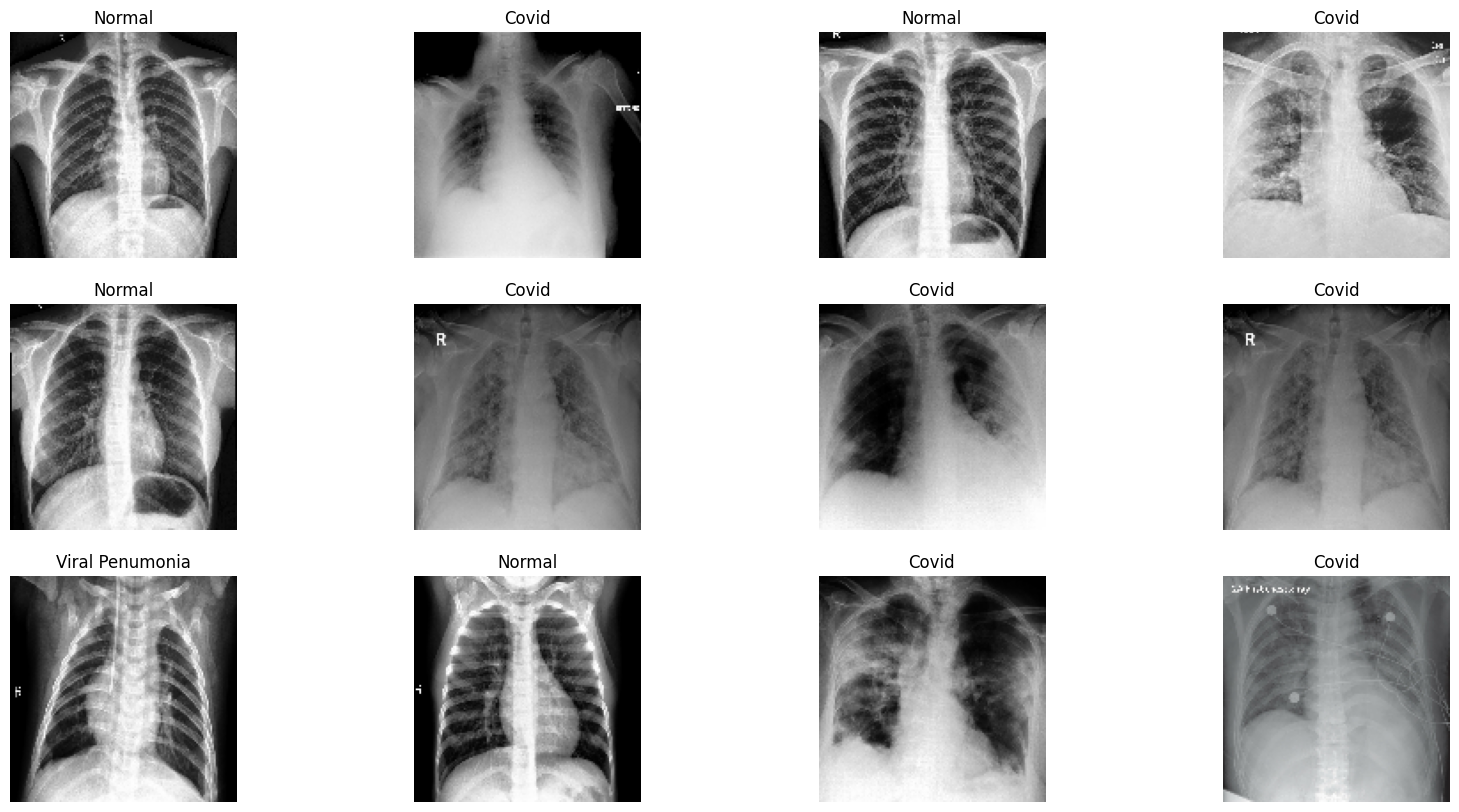

In [ ]:
class_names = ['Covid','Normal','Viral Penumonia']
plt.figure(figsize=(20,10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)
# model.summary()

In [ ]:
model.fit(
    train_ds,
    validation_data = test_ds,
    epochs = 50
)

Epoch 1/50
13/13 [==============================] - 26s 2s/step - loss: 1.0633 - accuracy: 0.5458 - val_loss: 0.8822 - val_accuracy: 0.7121
Epoch 2/50
13/13 [==============================] - 11s 614ms/step - loss: 0.5091 - accuracy: 0.8446 - val_loss: 0.9797 - val_accuracy: 0.6818
Epoch 3/50
13/13 [==============================] - 10s 511ms/step - loss: 0.3345 - accuracy: 0.8645 - val_loss: 0.5851 - val_accuracy: 0.7273
Epoch 4/50
13/13 [==============================] - 12s 518ms/step - loss: 0.2180 - accuracy: 0.9044 - val_loss: 0.2976 - val_accuracy: 0.8788
Epoch 5/50
13/13 [==============================] - 11s 651ms/step - loss: 0.1632 - accuracy: 0.9363 - val_loss: 0.1947 - val_accuracy: 0.9394
Epoch 6/50
13/13 [==============================] - 11s 518ms/step - loss: 0.1153 - accuracy: 0.9402 - val_loss: 0.1724 - val_accuracy: 0.9394
Epoch 7/50
13/13 [==============================] - 12s 677ms/step - loss: 0.0964 - accuracy: 0.9641 - val_loss: 0.2814 - val_accuracy: 0.8939
Ep

In [ ]:
model.save('model/vgg16_best.h5', True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.evaluate(test_ds)

4/4 [==============================] - 1s 104ms/step - loss: 0.2751 - accuracy: 0.9242


[0.2751444876194, 0.9242424368858337]

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model/vgg16_best.h5', monitor='val_accuracy', verbose=1, mode='max',save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min",restore_best_weights=True, patience=5)

callbacks_list = [checkpoint,early]

history = model.fit(
        train_ds,
        validation_data = test_ds,
        #steps_per_epoch=10,
        epochs=20,
        shuffle=False,
        verbose=True,
        callbacks=callbacks_list)

Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 1.6700e-04 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 0.92424, saving model to model/vgg16_best.h5
13/13 [==============================] - 11s 653ms/step - loss: 1.6700e-04 - accuracy: 1.0000 - val_loss: 0.2733 - val_accuracy: 0.9242
Epoch 2/20
13/13 [==============================] - ETA: 0s - loss: 1.5350e-04 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.92424
13/13 [==============================] - 11s 472ms/step - loss: 1.5350e-04 - accuracy: 1.0000 - val_loss: 0.2785 - val_accuracy: 0.9242
Epoch 3/20
13/13 [==============================] - ETA: 0s - loss: 1.4465e-04 - accuracy: 1.0000
Epoch 3: val_accuracy improved from 0.92424 to 0.93939, saving model to model/vgg16_best.h5
13/13 [==============================] - 12s 656ms/step - loss: 1.4465e-04 - accuracy: 1.0000 - val_loss: 0.2808 - val_accuracy: 0.9394
Epoch 4/20
13/13 [==============================] - ETA: 0s - loss

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("./covid19-model.tflite", 'wb') as f:
  f.write(tflite_model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9

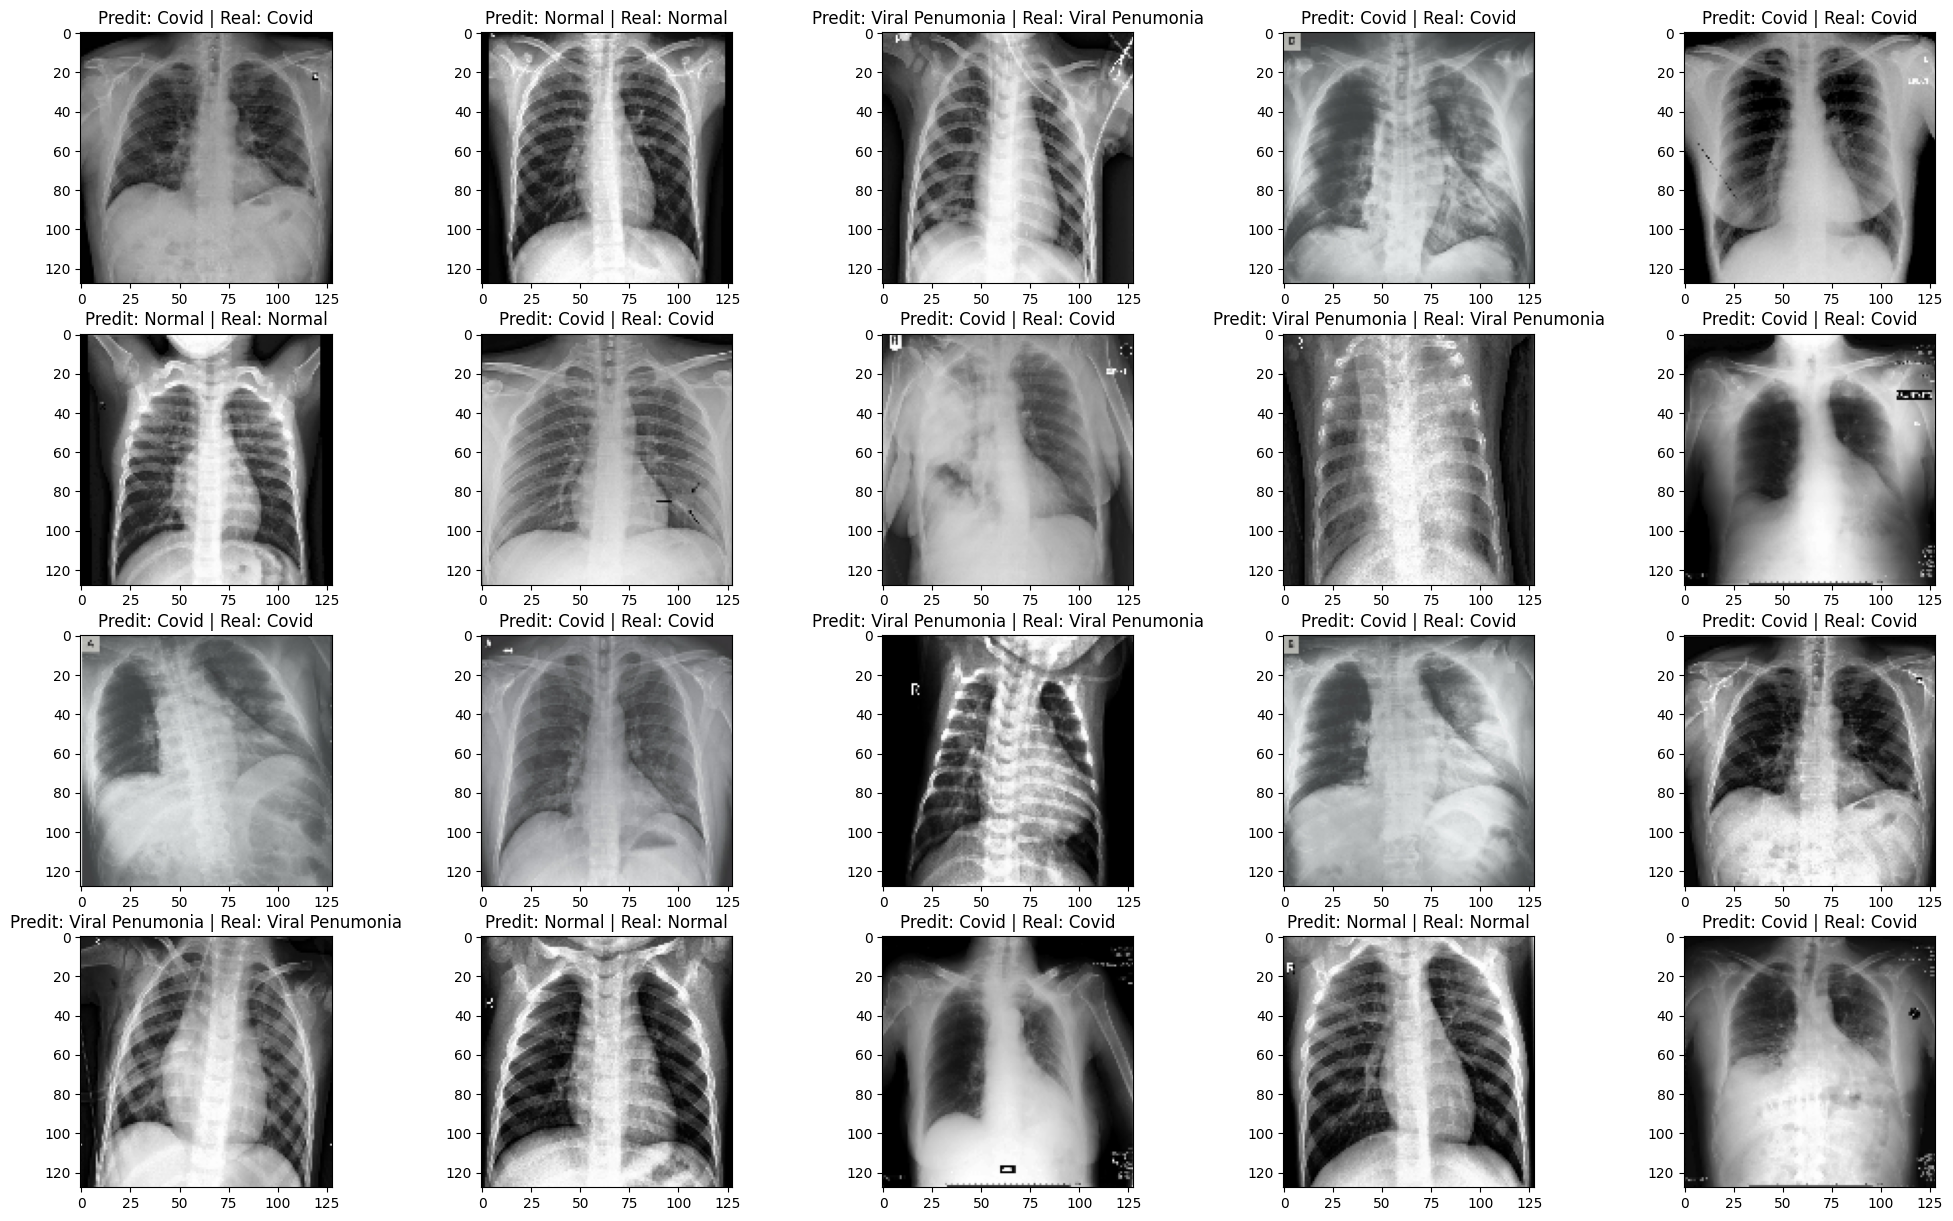

In [ ]:
# Load the model from the .h5 file
loaded_model = tf.keras.models.load_model("model/vgg16_best.h5")

# Print model summary
loaded_model.summary()
plt.figure(figsize=(25,15))
for images, labels in test_ds.take(1):
  classifications = loaded_model(images)
  # print(classifications)

  for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Predit: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
import numpy as np

# Assuming 'class_names' is defined as ['Covid', 'Normal', 'Viral Pneumonia']
class_names = ['Covid', 'Normal', 'Viral Pneumonia']

# Function to preprocess the image for prediction
def preprocess_image(image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array /= 255.0  # Normalize to [0,1]
    return img_array

# Function to make predictions on a single image
def predict_single_image(image_path, model):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]
    return predicted_class

# Example usage:
image_path = "/content/drive/MyDrive/Covid19-dataset/test/Covid/0102.jpeg"
prediction = predict_single_image(image_path, loaded_model)
print(f"The predicted class is: {prediction}")


1/1 [==============================] - 0s 129ms/step
The predicted class is: Covid


1/1 [==============================] - 0s 91ms/step


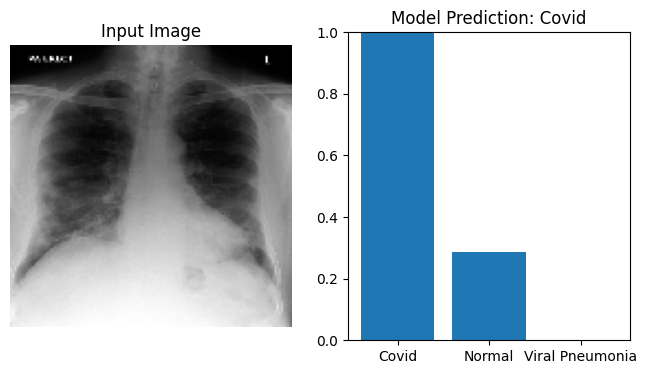

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to load and preprocess an image for prediction
def load_and_preprocess_image(image_path, img_height, img_width):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to between 0 and 1
    return img_array

# Function to make predictions using a given model and display the result
def make_and_display_predictions(model, image_path, class_names):
    img_array = load_and_preprocess_image(image_path, img_height, img_width)
    predictions = model.predict(img_array)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image.load_img(image_path, target_size=(img_height, img_width)))
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(class_names, predictions[0])
    plt.title(f"Model Prediction: {class_names[np.argmax(predictions[0])]}")
    plt.ylim([0, 1])
    plt.show()

# Example usage for the existing model
image_path = "/content/drive/MyDrive/Covid19-dataset/test/Covid/0102.jpeg"  # Replace with the path to your image
make_and_display_predictions(model, image_path, class_names)

1/1 [==============================] - 0s 183ms/step
Confusion Matrix:
[[26  0  0]
 [ 1 17  2]
 [ 0  1 19]]
Accuracy: 0.94
Precision: 0.94
Recall: 0.94


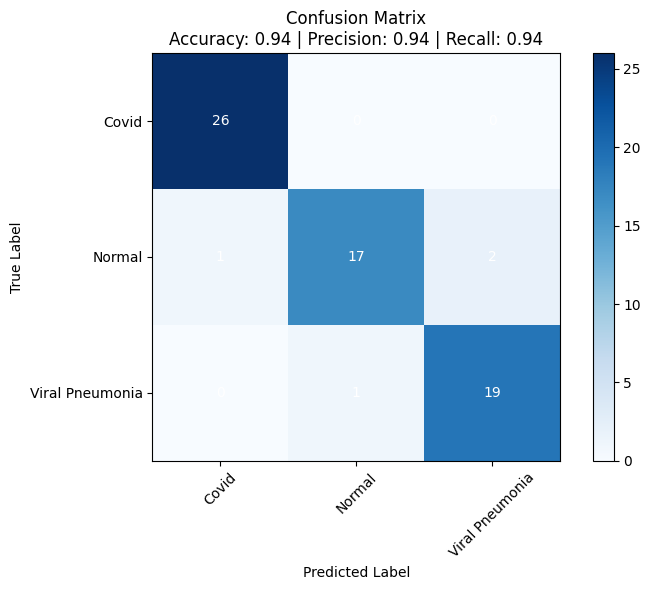

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Function to generate confusion matrix with accuracy, precision, and recall
def generate_confusion_matrix(model, test_ds, class_names):
    # Initialize lists to store true and predicted labels
    true_labels = []
    predicted_labels = []

    # Iterate over the test dataset and make predictions
    for images, labels in test_ds:
        predictions = model.predict(images)
        predicted_labels.extend(np.argmax(predictions, axis=1))
        true_labels.extend(labels.numpy())

    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')

    # Plot confusion matrix with accuracy, precision, and recall
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f}')
    plt.colorbar()

    # Add numerical values to each cell
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()

    # Print confusion matrix, accuracy, precision, and recall
    print("Confusion Matrix:")
    print(cm)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')

# Generate confusion matrix with accuracy, precision, and recall
generate_confusion_matrix(loaded_model, test_ds, class_names)



In [ ]:
model_fnn = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(img_height, img_width, 3)),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax")
    ]
)

model_fnn.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history_fnn = model_fnn.fit(
    train_ds,
    validation_data=test_ds,
    epochs=15
)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 [==============================] - 12s 556ms/step - loss: 3583.2478 - accuracy: 0.3984 - val_loss: 1371.2346 - val_accuracy: 0.5455
Epoch 2/15
13/13 [==============================] - 8s 399ms/step - loss: 1564.0554 - accuracy: 0.5936 - val_loss: 926.6567 - val_accuracy: 0.5909
Epoch 3/15
13/13 [==============================] - 7s 352ms/step - loss: 944.1357 - accuracy: 0.7012 - val_loss: 762.6969 - val_accuracy: 0.6364
Epoch 4/15
13/13 [==============================] - 9s 394ms/step - loss: 575.1105 - accuracy: 0.7450 - val_loss: 343.1073 - val_accuracy: 0.6667
Epoch 5/15
13/13 [==============================] - 10s 523ms/step - loss: 303.6156 - accuracy: 0.7849 - val_loss: 121.9437 - val_accuracy: 0.8182
Epoch 6/15
13/13 [==============================] - 8s 356ms/step - loss: 268.5987 - accuracy: 0.7410 - val_loss: 107.3169 - val_accuracy: 0.7273
Epoch 7/15
13/13 [==============================] - 9s 406ms/step - loss: 141.4722 - accuracy: 0.7450 - val_loss: 94.6831 - val_ac

1/1 [==============================] - 0s 54ms/step


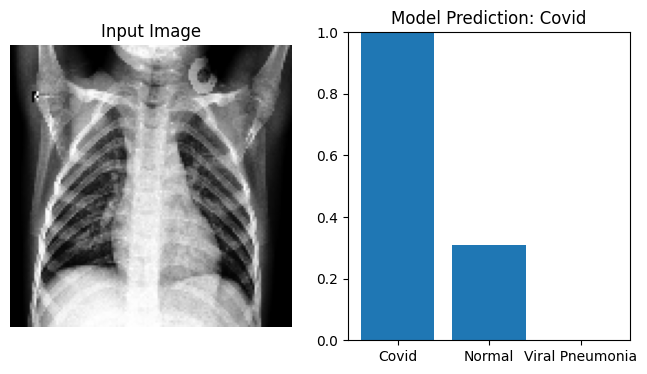

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to load and preprocess an image for prediction
def load_and_preprocess_image(image_path, img_height, img_width):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to between 0 and 1
    return img_array

# Function to make predictions using a given model and display the result
def make_and_display_predictions(model_fnn, image_path, class_names):
    img_array = load_and_preprocess_image(image_path, img_height, img_width)
    predictions = model.predict(img_array)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image.load_img(image_path, target_size=(img_height, img_width)))
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(class_names, predictions[0])
    plt.title(f"Model Prediction: {class_names[np.argmax(predictions[0])]}")
    plt.ylim([0, 1])
    plt.show()

# Example usage for the existing model
image_path = "/content/drive/MyDrive/Covid19-dataset/test/Normal/0107.jpeg"  # Replace with the path to your image
make_and_display_predictions(model_fnn, image_path, class_names)

1/1 [==============================] - 0s 34ms/step
Confusion Matrix:
[[16 10  0]
 [ 0 20  0]
 [ 0 18  2]]
Precision: 0.8232323232323233
Recall: 0.5757575757575758
Accuracy: 0.5757575757575758


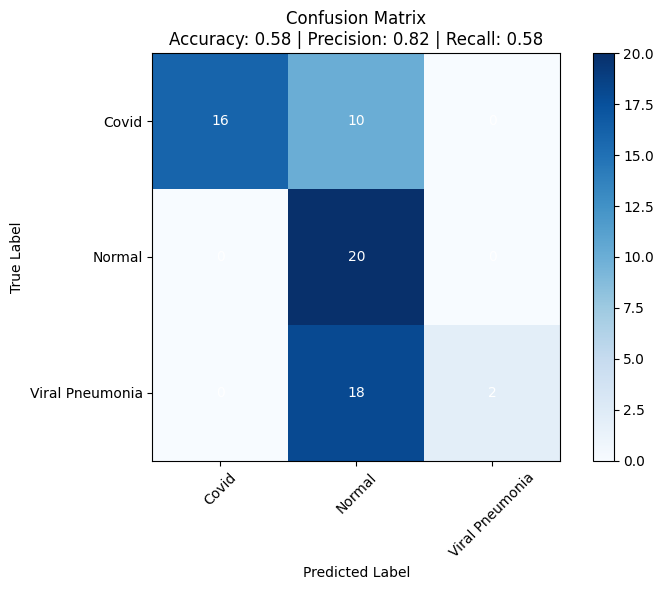

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Function to generate confusion matrix with precision, recall, and accuracy
def generate_confusion_matrix(model, test_ds, class_names):
    # Initialize lists to store true and predicted labels
    true_labels = []
    predicted_labels = []

    # Iterate over the test dataset and make predictions
    for images, labels in test_ds:
        predictions = model.predict(images)
        predicted_labels.extend(np.argmax(predictions, axis=1))
        true_labels.extend(labels.numpy())

    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Calculate precision, recall, and accuracy
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Plot confusion matrix with values inside the box
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f}')
    plt.colorbar()

    # Add numerical values to each cell
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()

    # Print confusion matrix, precision, recall, and accuracy
    print("Confusion Matrix:")
    print(cm)
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'Accuracy: {accuracy}')

# Generate confusion matrix with precision, recall, and accuracy
generate_confusion_matrix(model_fnn, test_ds, class_names)




In [ ]:
model_extended_cnn = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(64, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(256, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax")
    ]
)

model_extended_cnn.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history_extended_cnn = model_extended_cnn.fit(
    train_ds,
    validation_data=test_ds,
    epochs=15
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 [==============================] - 39s 3s/step - loss: 1.0796 - accuracy: 0.5458 - val_loss: 0.6556 - val_accuracy: 0.7273
Epoch 2/15
13/13 [==============================] - 37s 3s/step - loss: 0.5959 - accuracy: 0.7729 - val_loss: 0.6306 - val_accuracy: 0.6515
Epoch 3/15
13/13 [==============================] - 37s 3s/step - loss: 0.4526 - accuracy: 0.8486 - val_loss: 0.3792 - val_accuracy: 0.8636
Epoch 4/15
13/13 [==============================] - 36s 3s/step - loss: 0.3839 - accuracy: 0.8645 - val_loss: 0.3947 - val_accuracy: 0.8030
Epoch 5/15
13/13 [==============================] - 36s 3s/step - loss: 0.2361 - accuracy: 0.9124 - val_loss: 0.3463 - val_accuracy: 0.8030
Epoch 6/15
13/13 [==============================] - 37s 3s/step - loss: 0.1771 - accuracy: 0.9402 - val_loss: 0.2281 - val_accuracy: 0.9091
Epoch 7/15
13/13 [==============================] - 39s 3s/step - loss: 0.1591 - accuracy: 0.9363 - val_loss: 0.2157 - val_accuracy: 0.8788
Epoch 8/15
13/13 [=============

1/1 [==============================] - 0s 136ms/step


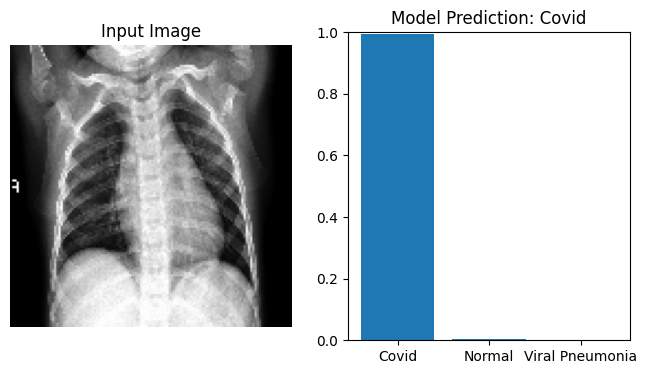

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to load and preprocess an image for prediction
def load_and_preprocess_image(image_path, img_height, img_width):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to between 0 and 1
    return img_array

# Function to make predictions using a given model and display the result
def make_and_display_predictions(model, image_path, class_names):
    img_array = load_and_preprocess_image(image_path, img_height, img_width)
    predictions = model.predict(img_array)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image.load_img(image_path, target_size=(img_height, img_width)))
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(class_names, predictions[0])
    plt.title(f"Model Prediction: {class_names[np.argmax(predictions[0])]}")
    plt.ylim([0, 1])
    plt.show()

# Example usage for the existing model
image_path = "/content/drive/MyDrive/Covid19-dataset/test/Normal/0109.jpeg"  # Replace with the path to your image
make_and_display_predictions(model_extended_cnn, image_path, class_names)


1/1 [==============================] - 0s 168ms/step
Confusion Matrix:
[[25  1  0]
 [ 1 14  5]
 [ 0  4 16]]
Precision: 0.8329535961114908
Recall: 0.8333333333333334
Accuracy: 0.8333333333333334


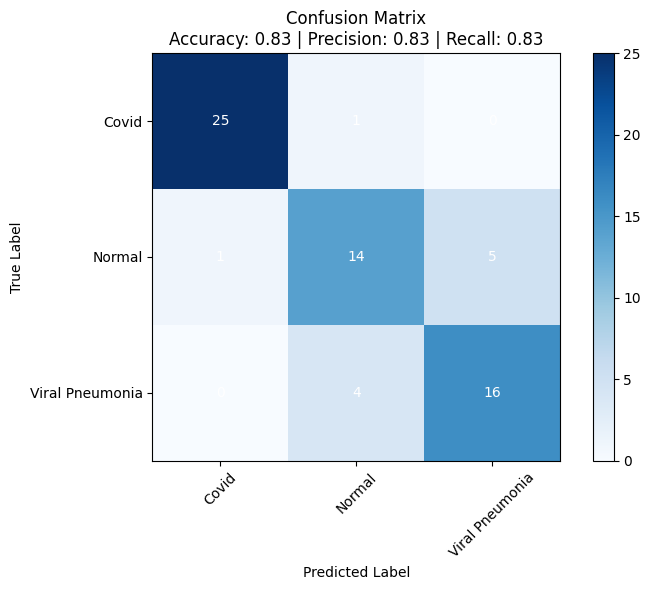

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Function to generate confusion matrix with precision, recall, and accuracy
def generate_confusion_matrix(model, test_ds, class_names):
    # Initialize lists to store true and predicted labels
    true_labels = []
    predicted_labels = []

    # Iterate over the test dataset and make predictions
    for images, labels in test_ds:
        predictions = model.predict(images)
        predicted_labels.extend(np.argmax(predictions, axis=1))
        true_labels.extend(labels.numpy())

    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Calculate precision, recall, and accuracy
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Plot confusion matrix with values inside the box
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f}')
    plt.colorbar()

    # Add numerical values to each cell
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()

    # Print confusion matrix, precision, recall, and accuracy
    print("Confusion Matrix:")
    print(cm)
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'Accuracy: {accuracy}')

# Generate confusion matrix with precision, recall, and accuracy
generate_confusion_matrix(model_extended_cnn, test_ds, class_names)


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Create a base MobileNetV2 model with pre-trained weights
base_model_mobilenetv2 = MobileNetV2(input_shape=(img_height, img_width, 3),
                                     include_top=False,
                                     weights='imagenet')

# Freeze the base model
base_model_mobilenetv2.trainable = False

# Create a new model on top of the base model
model_mobilenetv2 = tf.keras.Sequential([
    base_model_mobilenetv2,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_mobilenetv2.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the MobileNetV2 model (if not already trained)
# history_mobilenetv2 = model_mobilenetv2.fit(train_ds, validation_data=test_ds, epochs=50)

# Function to make predictions using the MobileNetV2 model
def predict_with_mobilenetv2_model(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = preprocess_input(img_array)
    predictions_mobilenetv2 = model_mobilenetv2.predict(img_array)
    return predictions_mobilenetv2

# Example usage for the MobileNetV2 model
image_path_mobilenetv2 = "/content/drive/MyDrive/Covid19-dataset/test/Normal/0103.jpeg"  # Replace with the path to your image
predictions_mobilenetv2 = predict_with_mobilenetv2_model(image_path_mobilenetv2)
print(f"MobileNetV2 Model Prediction: {class_names[np.argmax(predictions_mobilenetv2)]}")


1/1 [==============================] - 1s 962ms/step
MobileNetV2 Model Prediction: Normal


1/1 [==============================] - 0s 39ms/step


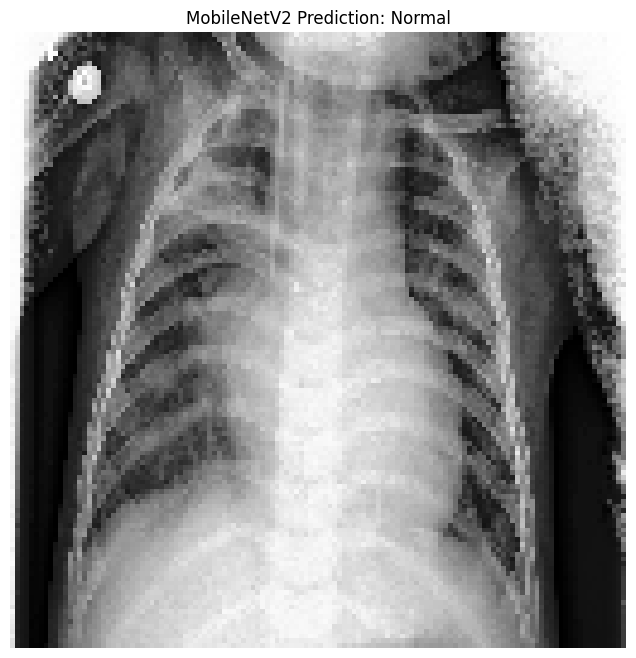

In [ ]:
# Function to make predictions using the MobileNetV2 model
def predict_with_mobilenetv2_model(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = preprocess_input(img_array)
    predictions_mobilenetv2 = model_mobilenetv2.predict(img_array)
    return predictions_mobilenetv2, img_array

# Example usage for the MobileNetV2 model
image_path_mobilenetv2 = "/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0102.jpeg"  # Replace with the path to your image
predictions_mobilenetv2, img_array_mobilenetv2 = predict_with_mobilenetv2_model(image_path_mobilenetv2)

# Display the image and predictions
plt.figure(figsize=(8, 8))
plt.imshow(tf.keras.preprocessing.image.array_to_img(img_array_mobilenetv2[0]))
plt.title(f"MobileNetV2 Prediction: {class_names[np.argmax(predictions_mobilenetv2)]}")
plt.axis("off")
plt.show()


1/1 [==============================] - 0s 171ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[ 0 11 15]
 [ 0  5 15]
 [ 0  3 17]]
Precision: 0.18935152193830806
Recall: 0.3333333333333333
Accuracy: 0.3333333333333333


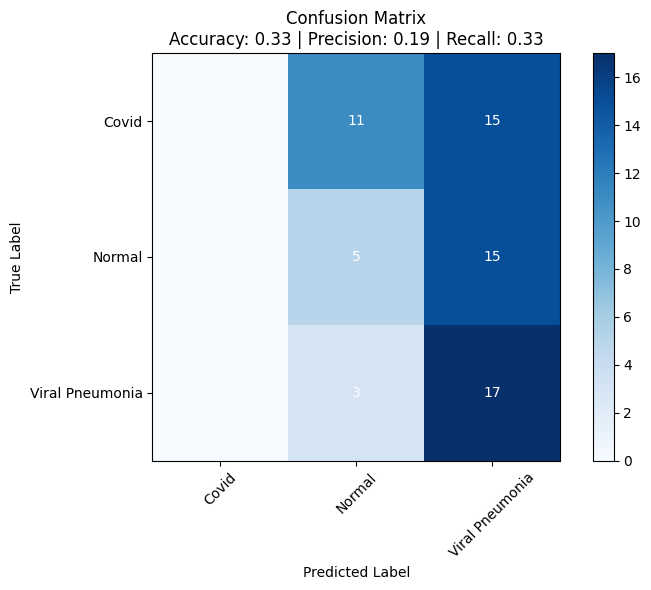

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Function to generate confusion matrix with precision, recall, and accuracy
def generate_confusion_matrix(model, test_ds, class_names):
    # Initialize lists to store true and predicted labels
    true_labels = []
    predicted_labels = []

    # Iterate over the test dataset and make predictions
    for images, labels in test_ds:
        predictions = model.predict(images)
        predicted_labels.extend(np.argmax(predictions, axis=1))
        true_labels.extend(labels.numpy())

    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Calculate precision, recall, and accuracy
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Plot confusion matrix with values inside the box
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f}')
    plt.colorbar()

    # Add numerical values to each cell
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()

    # Print confusion matrix, precision, recall, and accuracy
    print("Confusion Matrix:")
    print(cm)
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'Accuracy: {accuracy}')

# Generate confusion matrix with precision, recall, and accuracy for MobileNetV2 model
generate_confusion_matrix(model_mobilenetv2, test_ds, class_names)


In [ ]:
# RNN model with LSTM layers
model_rnn_lstm = tf.keras.Sequential([
    tf.keras.layers.Reshape((img_height * img_width, 3), input_shape=(img_height, img_width, 3)),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_rnn_lstm.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Function to make predictions using the RNN with LSTM model
def predict_with_rnn_lstm_model(image_path):
    img_array = load_and_preprocess_image(image_path, img_height, img_width)
    img_array = np.expand_dims(img_array, axis=0)

    # Reshape the image array to match the input shape of the model
    img_array_reshaped = img_array.reshape((1, img_height, img_width, 3))

    predictions_rnn_lstm = model_rnn_lstm.predict(img_array_reshaped)
    return predictions_rnn_lstm

# Example usage for the RNN with LSTM model
image_path_rnn_lstm = "/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0101.jpeg"  # Replace with the path to your image
predictions_rnn_lstm = predict_with_rnn_lstm_model(image_path_rnn_lstm)
print(f"RNN with LSTM Model Prediction: {class_names[np.argmax(predictions_rnn_lstm)]}")


1/1 [==============================] - 3s 3s/step
RNN with LSTM Model Prediction: Viral Pneumonia


In [ ]:
# Function to preprocess the image for prediction
def preprocess_image(image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array /= 255.0  # Normalize to [0,1]
    return img_array

# Function to make predictions on a single image
def predict_single_image(image_path, model):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)

    # Get the index with the highest probability
    predicted_class_index = np.argmax(predictions)

    # Get the predicted class label
    predicted_class = class_names[predicted_class_index]

    # Optionally, print the raw probabilities for each class
    print("Raw Probabilities:", predictions)

    return predicted_class

# Example usage:
image_path = "/content/drive/MyDrive/Covid19-dataset/test/Covid/0102.jpeg"
prediction = predict_single_image(image_path, loaded_model)
print(f"The predicted class is: {prediction}")


1/1 [==============================] - 0s 41ms/step
Raw Probabilities: [[ 2.195421    0.29473147 -1.2461128 ]]
The predicted class is: Covid


1/1 [==============================] - 1s 1s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[ 0 17  9]
 [ 0 17  3]
 [ 0 11  9]]
Precision: 0.24434824434824434
Recall: 0.3939393939393939
Accuracy: 0.3939393939393939


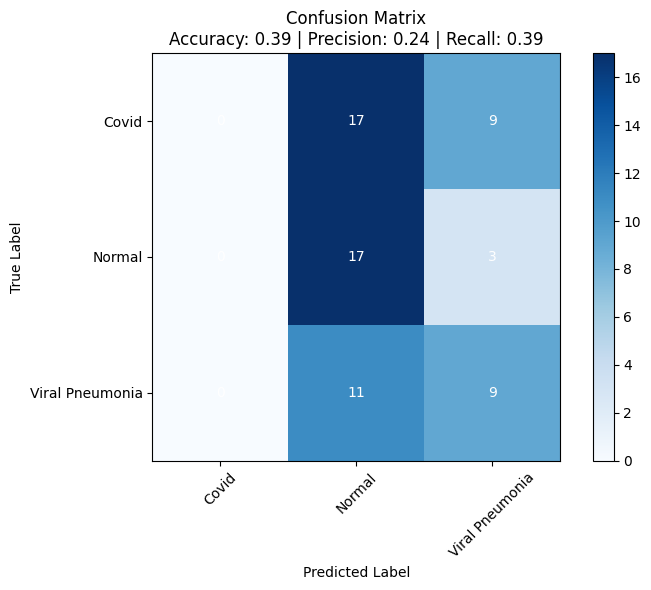

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Function to generate confusion matrix with precision, recall, and accuracy
def generate_confusion_matrix(model, test_ds, class_names):
    # Initialize lists to store true and predicted labels
    true_labels = []
    predicted_labels = []

    # Iterate over the test dataset and make predictions
    for images, labels in test_ds:
        predictions = model.predict(images)
        predicted_labels.extend(np.argmax(predictions, axis=1))
        true_labels.extend(labels.numpy())

    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Calculate precision, recall, and accuracy
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Plot confusion matrix with values inside the box
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f}')
    plt.colorbar()

    # Add numerical values to each cell
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()

    # Print confusion matrix, precision, recall, and accuracy
    print("Confusion Matrix:")
    print(cm)
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'Accuracy: {accuracy}')

# Generate confusion matrix with precision, recall, and accuracy for RNN with LSTM model
generate_confusion_matrix(model_rnn_lstm, test_ds, class_names)


In [ ]:
from prettytable import PrettyTable
x=PrettyTable(['Model','Testing Accuracy'])
x.add_row(['VGG16 Model','0.94'])
x.add_row(['Fully Connected Neural Network (FNN)','0.57'])
x.add_row(['Extended CNN','0.83'])
x.add_row(['MobileNetV2','0.33'])
x.add_row(['RNN with LSTM Layers','0.39'])
print(x)

+--------------------------------------+------------------+
|                Model                 | Testing Accuracy |
+--------------------------------------+------------------+
|             VGG16 Model              |       0.94       |
| Fully Connected Neural Network (FNN) |       0.57       |
|             Extended CNN             |       0.83       |
|             MobileNetV2              |       0.33       |
|         RNN with LSTM Layers         |       0.39       |
+--------------------------------------+------------------+
